In [1]:
import os
import pandas as pd
import seaborn as sns
import random
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
actual_wd = os.getcwd()
actual_wd

'C:\\Users\\FABIO\\OneDrive\\Documentos\\GitHub\\boticarios_v2\\notebooks'

In [3]:
new_wd = "../scripts/web_scraping/packages"
os.chdir(new_wd)
os.getcwd()

'C:\\Users\\FABIO\\OneDrive\\Documentos\\GitHub\\boticarios_v2\\scripts\\web_scraping\\packages'

In [4]:
from runSQL import runSQL
from GetCredentials import GetCredentials
os.chdir(actual_wd)
os.getcwd()

'C:\\Users\\FABIO\\OneDrive\\Documentos\\GitHub\\boticarios_v2\\notebooks'

In [5]:
help(runSQL)

Help on function runSQL in module runSQL:

runSQL(SQL, user='postgres', password='A123', host='localhost', port='5432', database='postgres', sslcert=None, sslkey=None, sslrootcert=None, Select=True)
    Run SQL queries in postgreSQL with a Data Base conection
    
    Arguments:
        SQL         (String): Query to be executed on the Data Base.
        user        (String): Data base user. Default "postgres".
        password    (String): User password. Default "a123".
        host        (String): Data base Host. Default "localhost".
        port        (String): Data base Port. Default "5432".
        database    (String): Data base name. Default "postgres".
        sslcert     (String): Path to the ssl Cert (.crt).
        sslkey      (String): Path to the ssl Key (.key).
        sslrootcert (String): Path to the ssl Root Cert (.crt).
        Select      (Bool):   True for a "SELECT" Query (Default), False to run "INSERT, DELETE, DROP, TRUNCATE, UPDATE, etc"
    
    Returns (dict

In [6]:
help(GetCredentials)

Help on function GetCredentials in module GetCredentials:

GetCredentials(user, json_path='scripts/web_scraping/assets/private/gcp_boticarios//convertidos/log-in.json')
    DOCUMENTATION PENDING...



In [7]:
user = "fsalinas"
cr = GetCredentials(user, "../scripts/web_scraping/assets/private/gcp_boticarios/convertidos/log-in.json")

In [8]:
sql = """
SELECT scraping_date, EXTRACT(HOUR FROM scraping_time) as hour, count(*) as products
FROM boticarios_transactional.colsubsidio
GROUP BY 1, 2
ORDER BY 1, 2;
"""

In [9]:
postgreSQL_result = runSQL(
    SQL=sql,
    user=user,
    password=cr[0],
    host=cr[1],
    port=cr[2],
    database=cr[3],
    sslcert="../scripts/web_scraping/assets/private/gcp_boticarios/convertidos/ssl-cert.crt",
    sslkey="../scripts/web_scraping/assets/private/gcp_boticarios/convertidos/ssl-key.key",
    sslrootcert="../scripts/web_scraping/assets/private/gcp_boticarios/convertidos/ca-cert.crt",
    Select=True
)

In [10]:
df = postgreSQL_result["DataFrame"].copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   scraping_date  54 non-null     object 
 1   hour           54 non-null     float64
 2   products       54 non-null     int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.4+ KB


In [11]:
postgreSQL_result["DataFrame"]["products"].sum()

618623

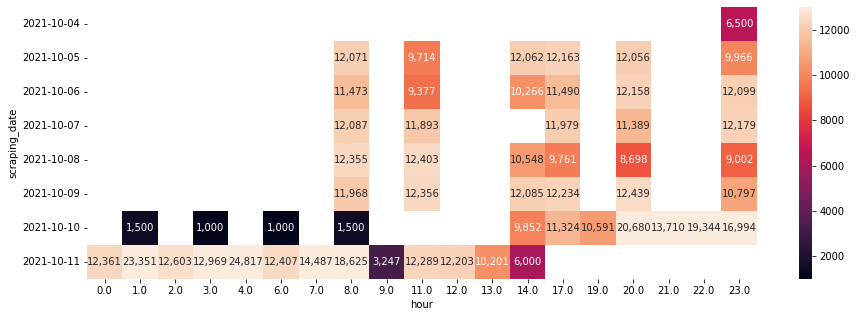

In [12]:
f, a = plt.subplots(1,1,figsize=(15,5))
heatmap_time = sns.heatmap(
    data= df.pivot_table(values="products", index="scraping_date", columns="hour", aggfunc='sum', fill_value=None, dropna=False),
    vmin=1000,
    vmax=13000,
    annot=True,
    fmt=',.0f',
    cmap=random.choice(["mako", "viridis", "rocket", "cubehelix", "rocket", "magma", "crest"])
)

In [13]:
def runProcess(table):
    sql = f"""
    SELECT scraping_date, EXTRACT(HOUR FROM scraping_time) as hour, count(*) as products
    FROM boticarios_transactional.{table}
    GROUP BY 1, 2
    ORDER BY 1, 2;
    """

    postgreSQL_result = runSQL(
        SQL=sql,
        user=user,
        password=cr[0],
        host=cr[1],
        port=cr[2],
        database=cr[3],
        sslcert="../scripts/web_scraping/assets/private/gcp_boticarios/convertidos/ssl-cert.crt",
        sslkey="../scripts/web_scraping/assets/private/gcp_boticarios/convertidos/ssl-key.key",
        sslrootcert="../scripts/web_scraping/assets/private/gcp_boticarios/convertidos/ca-cert.crt",
        Select=True
    )

    df = postgreSQL_result["DataFrame"].copy()
    df.info()

    n = postgreSQL_result["DataFrame"]["products"].sum()
    print(f"Númber of products loaded to the Data Base: {n:,.0f}")

    f, a = plt.subplots(1,1,figsize=(15,5))
    a.set_title("Colsubsidio")
    heatmap_time = sns.heatmap(
        data= df.pivot_table(values="products", index="scraping_date", columns="hour", aggfunc='sum', fill_value=None, dropna=False),
        vmin=1000,
        vmax=13000,
        annot=True,
        fmt=',.0f',
        cmap=random.choice(["mako", "viridis", "rocket", "cubehelix", "rocket", "magma", "crest"])
    )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   scraping_date  56 non-null     object 
 1   hour           56 non-null     float64
 2   products       56 non-null     int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.4+ KB
Númber of products loaded to the Data Base: 644,489


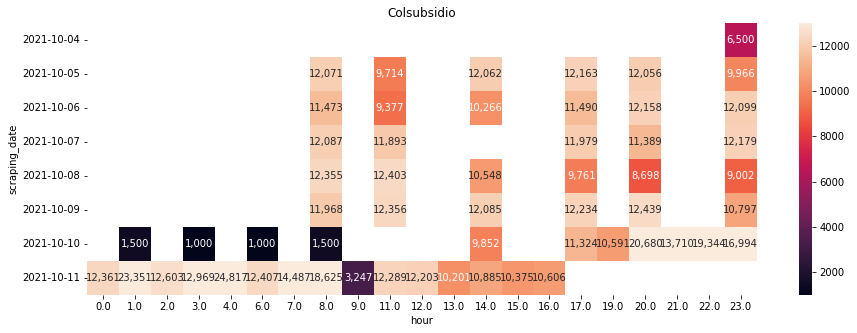

In [19]:
runProcess("colsubsidio")

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   scraping_date  0 non-null      object
 1   hour           0 non-null      object
 2   products       0 non-null      object
dtypes: object(3)
memory usage: 0.0+ bytes
Númber of products loaded to the Data Base: 0


c:\users\fabio\miniconda3\lib\site-packages\seaborn\matrix.py:305: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
c:\users\fabio\miniconda3\lib\site-packages\seaborn\matrix.py:305: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


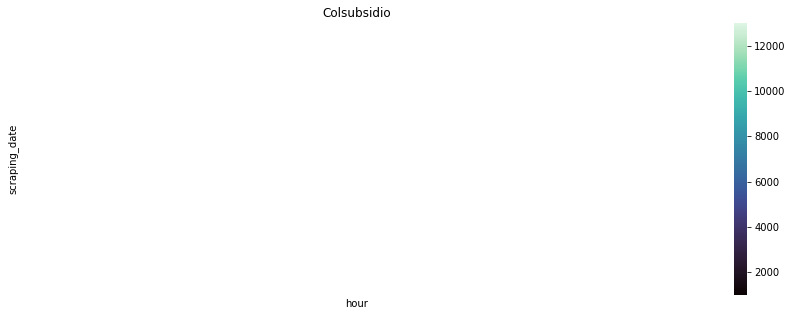

In [15]:
runProcess("cafam")